#### 특성 공학과 규제
- 여러 특성을 사용한 다중 회귀에 대해 배우고
- 사이킷런의 여러 도구를 사용
- 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회기

##### 다중회귀
- 여러 개의 특성을 사용한 선형 회귀

In [ ]:
# 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선
# 2개의 특성을 상요하면 평면을 학습함.
# 특성이 2개이면 타깃과 함께 3차원 공간을 형성하고 
# 선형 회귀 방정식 : 타깃 = a x 특성1 + b x 특성2 + 절편

In [ ]:
# 농어의 길이 , 농어의 길이**2
# 농어의 두께 , 농어의 두께**2

# 농어길이 x 농어두께 >> 특성 공학 (feature engineering) : 기존의 특성을 사용해 
#  새로운 특성을 뽑아내는 작업

In [ ]:
# 판다스 == 데이터 분석 라이브러리
# 데이터 프레임 == 판다스의 핵심 데이터 구조

# 판다스를 사용해 농어 데이터를 인터넷에서 내려받아 데이터 프레임에 저장후
# 넘파이 배열로 변환하여 선형 회귀 모델 훈련


In [6]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv_data')


In [10]:
df.columns

Index(['length', ' height', ' width'], dtype='object')

In [11]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [12]:
# 타깃 데이터

import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [13]:
# perch_full과 perch_weight을 훈련 세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight,
                                                random_state=42)

In [ ]:
# 위의 데이터를 이용하여 새로운 특성 만들기

# 사이킷런의 > 변환기 이용 > fit(), transform() 메서드 제공
# sklearn.preprocessing 안에 있는 polynomiafestures 클래스 이용 

# fit()을 해야 transform() 가능 
# 두 메서드를 하나로 붙인 fit_transform() 메서드도 있음

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# 2개의 특성 2와 3으로 이루어진 샘플 하나 적용

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1,2,3,4,6,9]]

#  무게 : a x 길이 + b x 높이 + c x 두께 + d X 1
#  선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수
#  >> 특성 (길이,높이,두께,1)이 되는것.

[[1. 2. 3. 4. 6. 9.]]


In [15]:
# 사이킷런의 선형 모델은 자동으로 절편 추가 >> 특성 1이 필요없음
# include_bias = False로 지정하여 특성변환
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# 절편을 위한 항이 제거된고 특성의 제곱과 특성끼리 곱한 항만 추가됨

[[2. 3. 4. 6. 9.]]


In [16]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
# 특성이 9개로 반환됨

(42, 9)


In [17]:
# 9개의 특성이 어떻게 만들어졌는지 확인하는 클래스
# PolynomiaFeatures 클래스  >> get_feature_names() 메서드 호출하여 사용.
poly.get_feature_names()

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [18]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

In [ ]:
# 변환된 특성을 사용하여 다중회기 모델 훈련

# 다중 회기 모델 훈련하기

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [20]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982126
0.9714559911594143


In [ ]:
# 테스트 세트에 대하니 점수는 높아지지 않았지만
# 농어의 길이만 사용했을 때 있던 과소적합 문제는 더 이상 나타나지 않음

In [ ]:
# 특성을 더 많이 추가하면 높아지는지 확인하기
# PolynomiaFeatures 클래스의 degree 매개변수 사용 >> 고차항 최대 차수 지정 가능

In [21]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# 특성의 개수 5개

(42, 55)


In [22]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 테스트 점수가 음수로 나옴! 
# 특성의 개수를 크게 늘리면 선형 모델은 아주 강력해짐.
# 훈련 세트에 대해 거의 완벽하게 학습 가능
# 하지만 훈련 세트에 너무 과대적합 되어 테스트 세트에서 형편없는 점수를 만듦

0.999999999998714
-144.4066764700865


In [ ]:
# 과대적합을 해결하기 위한 방법

# 1. 특성의 개수 줄이기 
# 2. 규제

# 규제 (regularization) : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록
#   훼방하는 것을 말함.  >> 훈련 모델이 과대적합되지 않도록 만드는 것. 
#   선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

In [ ]:
# 55개의 특성을 훈련한 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 
# 대신 테스트 세트의 점수 높이기

In [24]:
# # **특성의 스케일**
# 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이나게 됨.
# >> 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면
# 공정하게 제어되지 않음.
# >> 규제를 적용하기 전 정규화 필요!

# >> scikit- learn에서 제공하는 StandardScalar 클래스 사용

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# >> 표준 점수로 변환한 train_scaled와 test_scaled 반환
# >> 훈련 세트에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 mean_, scale_ 속성에 저장됨

##### 릿지(ridge), 라쏘(lasso) = 선형 회귀 모델에 규제를 추가한 모델
- 두 모델은 규제를 가하는 방법이 다름.
- 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제 적용  (일반적으로 선호)
- 라쏘(lasso) : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들수도 있음.

- ```sklearn.linear_model``` 패키지 안에 있음

 ** 릿지(ridge) 회귀 **


In [ ]:

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 테스트 점수가 돌아옴! 

In [ ]:
# 릿지와 라쏘를 사용할 때 규제의 양을 임의로 조절 가능
# 모델 객체를 만들 때 alpha 매개변수로 규제 강도 조절
# alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도.
# appha 값이 작음녀 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성 큼.


#  >> alpha값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정하는 값임

# >> 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터 = 하이퍼 파라미터(hyperparameter)
#  머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현됨.
#  <책> 함수와 클래스의 파라미터 = 매개변수
#  <책> 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미터)

In [28]:
# 적절한 alpha 값을 찾는 방법 >> alpha값에 대한 R^2값의 그래프 그려보기
#  >> 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값

# 그래프를 그리기 위해 alpha값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트 생성

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1,10,100]
for alpha in alpha_list:
    # 릿지 모델 만들기
    ridge = Ridge(alpha)

    # 릿지 모델 훈련하기
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target)) 

In [ ]:
# 그래프 그리기 
# alpha값을 0.001 부터 10배씩 늘렸기 때문에 이대로 그리면 그래프 왼쪽이 촘촘해짐
# alpha_list에 있는 6개 값을 동일한 간격으로 나타내기 위해 로그함수로 바꾸어 지수로 표현
#  >> 0.001dms -3, 0.01dms -2가 되는 방식임

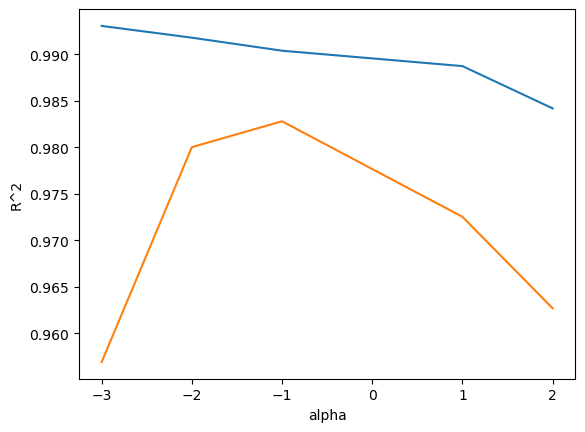

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트의 점수차이가 큼!
# >> 훈련 세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습!
# 오른 편은 훈련 세트와 테스트 세트 점수가 모두 낮아지는 과소적합으로 가는 모습

# 그래프에서 적절한 alpha값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은
#  -1 즉 0.1

In [33]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 훈련 세트와 테스트 세트의 점수가 비슷하게 높고 
# 과대적합과 과소적합 사이에서 균형을 맞추고 있음

0.9903815817570366
0.9827976465386989


** 라쏘(lasso) 회귀 **

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421886


In [37]:
# 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있음.

train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    # 라쏘 모델 만들기
    lasso = Lasso(alpha=alpha, max_iter=10000)

    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


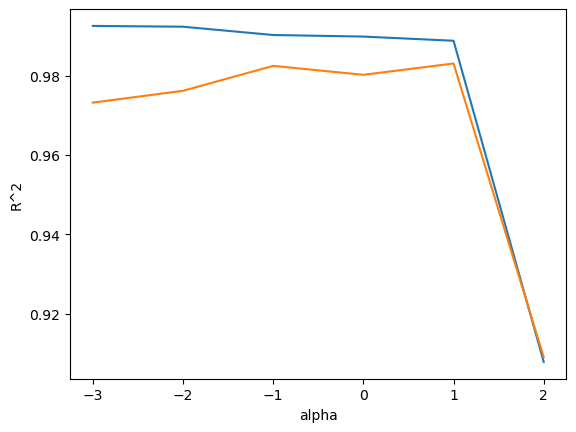

In [38]:
# train_score test_score 리스트 사용해 그래프 그리기
# x축은 로그 스케일로 바꾸기

import matplotlib.pyplot as plt 

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 왼쪽은 과대적합, 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀짐.
# 가장 오른쪽은 점수가 크게 떨어짐 == 과소적합되는 지점

# 라쏘 모델에서 최적의 alpha값은 1 ==> 10 

In [40]:
# alpha = 10값으로 모델 훈련

lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [41]:
# 라쏘모델은 계수값을 아예 0으로 만들 수 있음.
# 라쏘의 모델 계수 > coef_ 속성에 저장되어 있음.

print(np.sum(lasso.coef_ == 0))
# np.sum() 함수 배열을 모두 더한 값을 반환.
# 넘파이 배열에 비교 연산자를 사용했을 때 비교 각 원소는 True or False 값 반환함.

# np.sum() 함수는 True를 1로 False를 0으로 인식함.


# 40개의 계수가 0
# 55개의 특성 모델을 주입했지만 라쏘 모델이 사용한 특성은 15
# 이러한 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음,

40


전체 코드 적기

In [42]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv_data')

In [43]:
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [44]:
perch_full = df.to_numpy() # numpy 배열로 바꿀 수 있음
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv_data')

In [45]:
# 타깃 데이터

import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [47]:
# 파일 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight,
                                                                        random_state=42)

# 파일 변환 //  사이킷런의 변환기

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
# 전처리 단계 >> 특성을 여러개로 반환해줌 > 특성 공학

train_poly = poly.fit_transform(train_input)
print(train_poly.shape)

print(poly.get_feature_names()) # 특성이 어떤 값으로 이루어져있는지 확인

test_poly = poly.fit_transform(test_input)
print(test_poly.shape)



(42, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
(14, 9)


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
# 다중회기 모델 훈련하기

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982126
0.9714559911594143


In [49]:
# 특성을 여러개로 조합할 때 특성값 조정하기 degree

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.fit_transform(test_input)
print(train_poly.shape)
# 55개의 특성값이 반환됨을 확인

(42, 55)


In [51]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3', 'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2', 'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3', 'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4', 'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5']


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# >> 과대적합되어 말도 안되는 값이 나옴
# 다시 degree 특성 수 내려서 조정하거나
#  규제를 해야함.

0.999999999998714
-144.4066764700865


In [53]:
# 규제

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.fit_transform(test_poly)


# 릿지 회귀

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9133730480649974


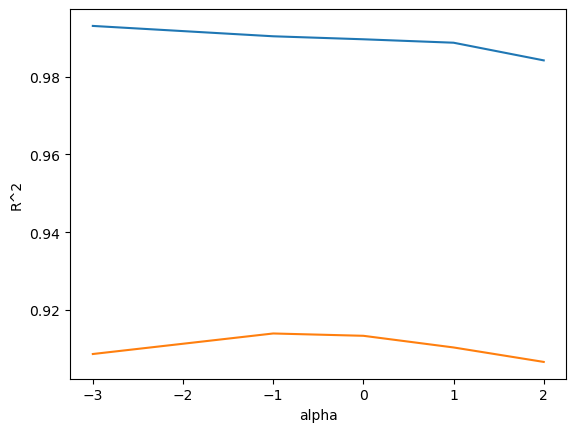

In [56]:
# alpha값을 찾아서 지정할 수 있음. (규제의 강도 조절)

# 그래프로 보기 위해서 값 만들기.

train_score = []
test_score = []

alpha_list = [0.001, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()



In [57]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9139693949942106


In [ ]:
## 뭔가 이상해

In [58]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv_data')

In [61]:
perch_full = df.to_numpy()

In [60]:
# 타깃 데이터

import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [63]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

# 데이터 특성 추가하기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly =poly.fit_transform(test_input)

# 데이터 규제
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.fit_transform(test_poly)

# 다항 회귀 실행
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

1.0
-3892.809226742655


In [67]:
train_score = []
test_score = []

alpha_list =[0.001,0.01, 1, 10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled, test_target))

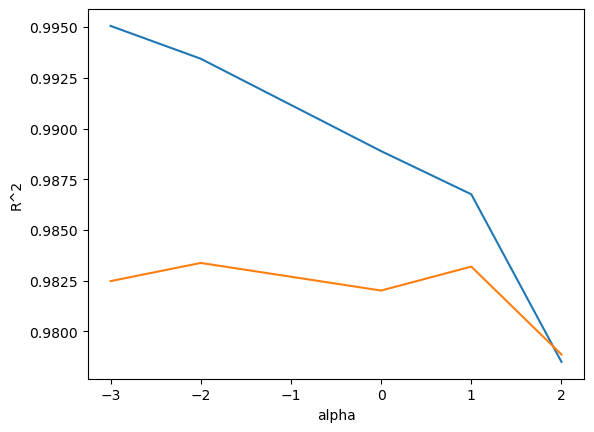

In [68]:
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [69]:
# alpha = 1, 10 으로 잡고 다시 릿지 모델 계산

ridge = Ridge(alpha=10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9867586936707754
0.9831974233521168


이제 라쏘 모델!

In [70]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9881562498953274
0.9828204053128319


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.045e+02, tolerance: 4.879e+02
  model = cd_fast.enet_coordinate_descent(


In [83]:
# 라쏘 모델도 alpha 규제강도 조절 가능

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+04, tolerance: 4.879e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+04, tolerance: 4.879e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.099e+03, tolerance: 

In [84]:
train_score

[0.9917124247584209,
 0.9916370983670827,
 0.9910183112435339,
 0.9881562498953274,
 0.9871453794310753,
 0.90116966990503]

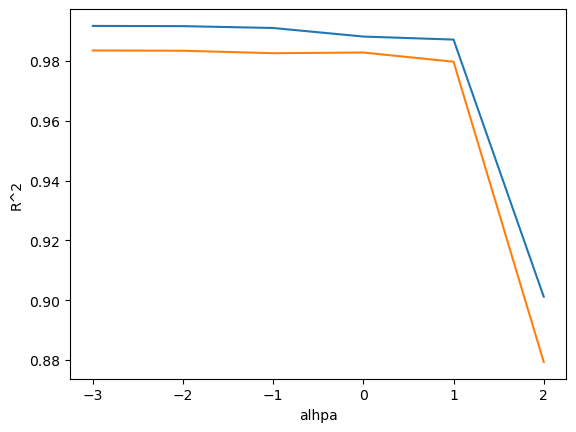

In [85]:
import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alhpa')
plt.ylabel('R^2')
plt.show()

In [86]:
# alpha = 1,

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9871453794310753
0.9797353795304835


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.740e+02, tolerance: 4.879e+02
  model = cd_fast.enet_coordinate_descent(


In [87]:
print(np.sum(lasso.coef_ == 0))

45


In [ ]:
# ** 키워드 핵심 **

# ** 다중 회귀 : 여러 개의 특성을 사용하는 회귀 모델.
#   특성이 많으면 선형 모델은 강력한 성능을 발휘

# ** 특성 공학 : 주어진 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정

# ** 릿지 : 규제가 있는 선형 회귀 모델 중 하나
#   선형 모델의 계수를 작게 만들어 과대적합 완화. 비교적 효과가 좋아 자주쓰임

# ** 라쏘 : 규제가 있는 선형 회귀 모델 중 하나
#   릿지와 달리 계수 값을 아예 0으로 만들 수 있음

# ** 하이퍼파라미터 : 머신러닝 알고리즘이 학습하지 않는 파라미터 .
#   사람이 사전에 지정. >> 릿지와 라쏘의 규제 강도 alpha 파라미터


In [ ]:
# ** 패키지 함수 **

# ** pandas

# * read_csv() : CSV 파일을 로컬 컴퓨터나 인터넷에서 읽어 판다스 데이터 프레임으로 변환하는 함수
#   * sep=   csv 파일 구분자 지정. 기본값(,)
#   * header= dataframe의 열 이름으로 사용할  CSV 파일의 행 번호 지정. 
#     기본값 = 첫 번째 행을 열 이름으로 사용
#   * skiprows 파일에서 읽기 전에 건너뛸 행의 개수 지정
#   * nrows 파일에서 읽을 행의 개수 지정

# ** scikit_learn
#   * PolynomialFeatures : 주어진 특성을 조합하여 새로운 특성을 만들어냄
#     * degree= 최고 차수 지정. 기본값==2
#     * interaction_only = True 거듭제곱 항 제거, 특성간의 곱셈 항만 추가. 기본값 == False
#     * include_bias : False이면 절편을 위한 특성을 추가하지 않음 . 기본값 == True

#   * Ridge : 규제가 있는 회귀 알고리즘인 릿지 모델 훈련
#     * alpha 매개변수로 규제의 강도 조절.
#       alpha 값이 클수록 규제가 세짐. 기본값 == 1
#     * solver 매개변수에 최적의 모델을 찾기 위한 방법 지정. 
#           기본값 == 'auto' (데이터에 따라 자동 선택)
#       - 'sag' 확률적 평균 경사 하강법 알고리즘
#             특성과 샘플 수가 많은 경우 성능이 빠르고 좋음 > 'saga'
#         random_state= slover가 'sag' 나 'saga'일때 넘파이 난수 시드값 지정 가능

#   * Lasso : 규제가 있는 회귀 알고리즘인 라쏘 모델 훈련
#     - 클래스는 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 
#     좌표 하강법(coordinate descent) 사용

#     * alpha, random_state 매개변수 Ridge 클래스와 동일
#     * max_iter 알고리즘의 수행 반복 횟수 지정 > 기본값 1000


확인 문제

In [ ]:
1. a, b, c 특성으로 이루어진 훈련 세트를 PolynomialFeatures(degree=3) 으로 변환
다음 중 변환된 데이터에 포함되지 않은 특성?

1. 1
2, a
3. a * b
4. a*b^3

4번

최고 차수가 3 이므로
1, a, b, c, a2, b2, c2, ab, bc, ac, abc, ab2, ac2, bc2, ba2, ca2, cb2, a3, b3, c3

In [ ]:
2. 다음 중 특성을 표준화하는 사이킷런 변화기 클래스
표준화!! StandardScaler

1. Ridge : 릿지 회귀를 위한 클래스
2. Lasso : 라쏘 회귀를 위한 클래스
3. StandardScaler
4. LinearRegression : 선형 회귀를 위한 클래스

In [ ]:
3. 다음 중 과대적합과 과소적합을 올바르게 표현하지 못한 것은?

1. 과대적합인 모델은 훈련 세트의 점수가 높음 
2. 과대적합인 모델은 테스트 세트의 점수도 높음 
3. 과소적합인 모델은 훈련세트의 점수가 낮습니다. 
4. 과소적합인 모델은 테스트 세트의 점수도 낮습니다.

>>2번
과대적합인 모델은 훈련 세트의 점수에 비해 테스트 세트의 점수가 크게 낮음